<a href="https://colab.research.google.com/github/anisafitriani1122/Tugas-Akhir/blob/main/PuncakLembah_dan_Regresi_Sinusoidal_Data_Taksiran_Muka_Air_Laut_Maksimum_Anisa_Fitriani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Menentukan Puncak dan Lembah

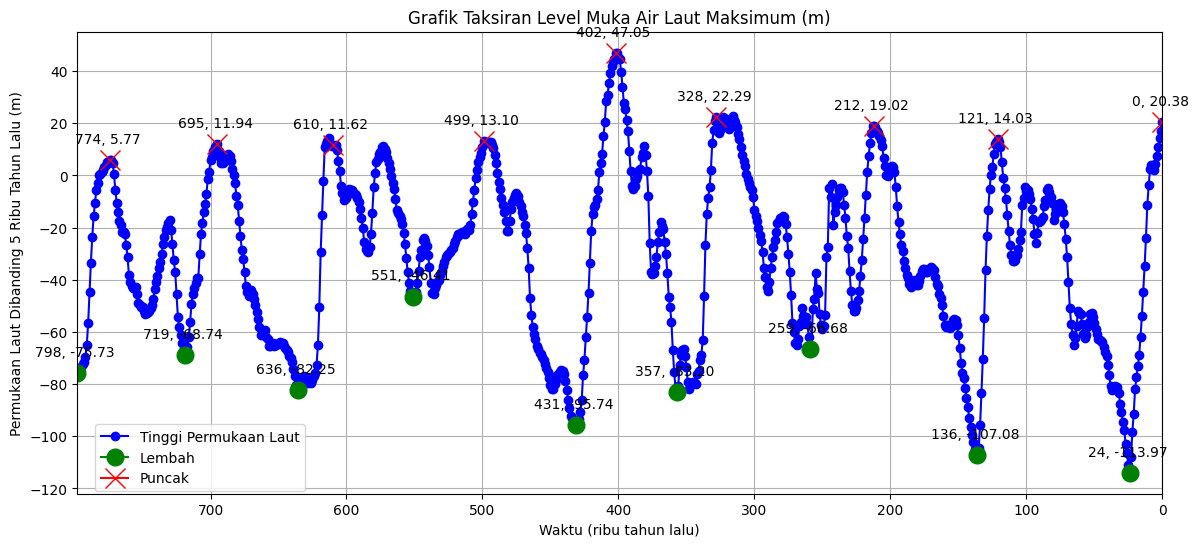

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Import Dataset
link = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTacoDEDwQG-V8RUcgo3PEiFqrBBAFePbGjxNoXMrNh8ozninhqJh30Et2mmBc-5mEa9aGD2qaq_-7X/pub?output=xlsx'

# Membaca file Excel dari URL dan memuatnya sebagai DataFrame Pandas
data = pd.read_excel(link)

# Misalkan kolom waktu dan tinggi permukaan laut ada di DataFrame
# Gantilah 'Waktu' dan 'Tinggi' dengan nama kolom yang sesuai dari DataFrame Anda
waktu = data['Waktu']  # Kolom waktu
tinggi = data['Sea Level Error Upper']  # Kolom tinggi permukaan laut

# Waktu lembah dan puncak
lembah = [798, 719, 636, 551, 431, 357, 259, 136, 24]
puncak = [774, 695, 610, 499, 402, 328, 212, 121, 0]

# Membuat grafik
plt.figure(figsize=(14, 6))
plt.plot(waktu, tinggi, marker='o', label='Tinggi Permukaan Laut', color='blue')
plt.title('Grafik Taksiran Level Muka Air Laut Maksimum (m)')
plt.xlabel('Waktu (ribu tahun lalu)')
plt.ylabel('Permukaan Laut Dibanding 5 Ribu Tahun Lalu (m)')
plt.grid(True)


# Menandai lembah (warna hijau) dan menampilkan nilai tinggi permukaan laut
for t in lembah:
    try:
        index = waktu[waktu == t].index[0]
        plt.plot(waktu[index], tinggi[index], marker='o', color='green', markersize=12, label='Lembah' if t == lembah[0] else "")
        plt.annotate(f'{t}, {tinggi[index]:.2f} ', (waktu[index], tinggi[index]), textcoords="offset points", xytext=(0,12), ha='center')
    except IndexError:
        print(f"Nilai waktu lembah {t} tidak ditemukan dalam data.")

# Menandai puncak (warna merah) dan menampilkan nilai tinggi permukaan laut
for t in puncak:
    try:
        index = waktu[waktu == t].index[0]
        plt.plot(waktu[index], tinggi[index], marker='x', color='red', markersize=15, label='Puncak' if t == puncak[0] else "")
        plt.annotate(f'{t}, {tinggi[index]:.2f} ', (waktu[index], tinggi[index]), textcoords="offset points", xytext=(0,12), ha='center')
    except IndexError:
        print(f"Nilai waktu puncak {t} tidak ditemukan dalam data.")

# Membalik sumbu x
plt.xlim(max(waktu), min(waktu))

# Show legend
plt.legend(bbox_to_anchor=(0.01, 0.165), loc='upper left')

plt.show()

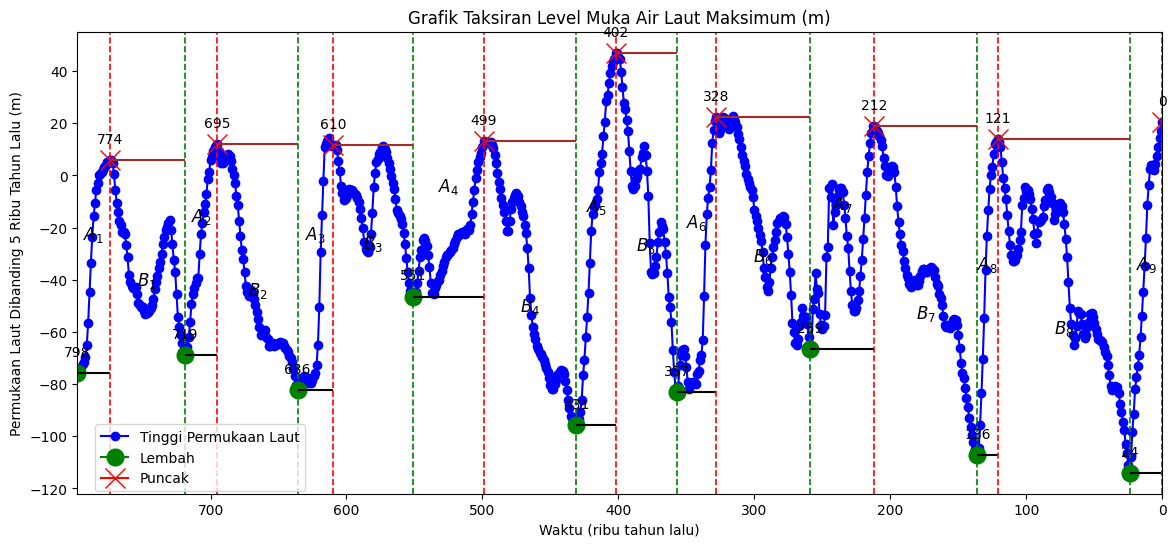

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Import Dataset
link = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTacoDEDwQG-V8RUcgo3PEiFqrBBAFePbGjxNoXMrNh8ozninhqJh30Et2mmBc-5mEa9aGD2qaq_-7X/pub?output=xlsx'

# Membaca file Excel dari URL dan memuatnya sebagai DataFrame Pandas
data = pd.read_excel(link)

# Misalkan kolom waktu dan tinggi permukaan laut ada di DataFrame
waktu = data['Waktu']  # Gantilah 'Waktu' dengan nama kolom yang sesuai
tinggi = data['Sea Level Error Upper']  # Gantilah 'Sea Level' dengan nama kolom yang sesuai

# Waktu lembah dan puncak
lembah = [798, 719, 636, 551, 431, 357, 259, 136, 24]
puncak = [774, 695, 610, 499, 402, 328, 212, 121, 0]


# Membuat grafik
plt.figure(figsize=(14, 6))
plt.plot(waktu, tinggi, marker='o', label='Tinggi Permukaan Laut', color='blue')
plt.title('Grafik Taksiran Level Muka Air Laut Maksimum (m)')
plt.xlabel('Waktu (ribu tahun lalu)')
plt.ylabel('Permukaan Laut Dibanding 5 Ribu Tahun Lalu (m)')
plt.grid(False)

# Menandai lembah (warna hijau) dan menambahkan garis vertikal dan horizontal
for i in range(len(lembah)):
    t = lembah[i]
    try:
        index = waktu[waktu == t].index[0]
        plt.plot(waktu[index], tinggi[index], marker='o', color='green', markersize=12, label='Lembah' if i == 0 else "")
        plt.annotate(str(t), (waktu[index], tinggi[index]), textcoords="offset points", xytext=(0,12), ha='center')
        plt.axvline(x=t, color='green', linestyle='--', linewidth=1.2)

        # Menambahkan garis horizontal hitam antara lembah dan puncak
        if i < len(puncak):
            puncak_index = waktu[waktu == puncak[i]].index[0]
            plt.hlines(tinggi[index], waktu[index], waktu[puncak_index], color='black', linestyle='-', linewidth=1.5)

    except IndexError:
        print(f"Nilai waktu lembah {t} tidak ditemukan dalam data.")

# Menandai puncak (warna merah) dan menambahkan garis vertikal
for i in range(len(puncak)):
    t = puncak[i]
    try:
        index = waktu[waktu == t].index[0]
        plt.plot(waktu[index], tinggi[index], marker='x', color='red', markersize=15, label='Puncak' if i == 0 else "")
        plt.annotate(str(t), (waktu[index], tinggi[index]), textcoords="offset points", xytext=(0,12), ha='center')
        plt.axvline(x=t, color='red', linestyle='--', linewidth=1.2)

        # Menambahkan label A_i di tengah antara lembah dan puncak
        if i < len(lembah):  # Pastikan ada lembah yang bersesuaian
            lembah_index = waktu[waktu == lembah[i]].index[0]
            mid_point = (waktu[lembah_index] + waktu[index]) / 2
            mid_height = (tinggi[lembah_index] + tinggi[index]) / 2
            plt.annotate(f'$A_{i+1}$', (mid_point, mid_height), textcoords="offset points", xytext=(0, 20), ha='center', fontsize=12, color='black')

        # Menambahkan garis horizontal coklat antara puncak dan lembah
        if i < len(lembah) - 1:  # Pastikan ada lembah yang bersesuaian
            next_lembah_index = waktu[waktu == lembah[i + 1]].index[0]
            plt.hlines(tinggi[index], waktu[index], waktu[next_lembah_index], color='brown', linestyle='-', linewidth=1.5)
            mid_point_B = (waktu[index] + waktu[next_lembah_index]) / 2
            mid_height_B = (tinggi[index] + tinggi[next_lembah_index]) / 2
            plt.annotate(f'$B_{i+1}$', (mid_point_B, mid_height_B), textcoords="offset points", xytext=(0, -20), ha='center', fontsize=12, color='black') # Mengatur xytext untuk menghindari tumpang tindih

    except IndexError:
        print(f"Nilai waktu puncak {t} tidak ditemukan dalam data.")

# Membalik sumbu x
plt.xlim(max(waktu), min(waktu))

# Menampilkan legenda di luar grafik dengan keterangan A dan B
plt.legend(bbox_to_anchor=(0.01, 0.165), loc='upper left')

plt.show()

A_1 (Selisih waktu antara lembah 1 dan puncak 1) = 24
A_2 (Selisih waktu antara lembah 2 dan puncak 2) = 24
A_3 (Selisih waktu antara lembah 3 dan puncak 3) = 26
A_4 (Selisih waktu antara lembah 4 dan puncak 4) = 52
A_5 (Selisih waktu antara lembah 5 dan puncak 5) = 29
A_6 (Selisih waktu antara lembah 6 dan puncak 6) = 29
A_7 (Selisih waktu antara lembah 7 dan puncak 7) = 47
A_8 (Selisih waktu antara lembah 8 dan puncak 8) = 15


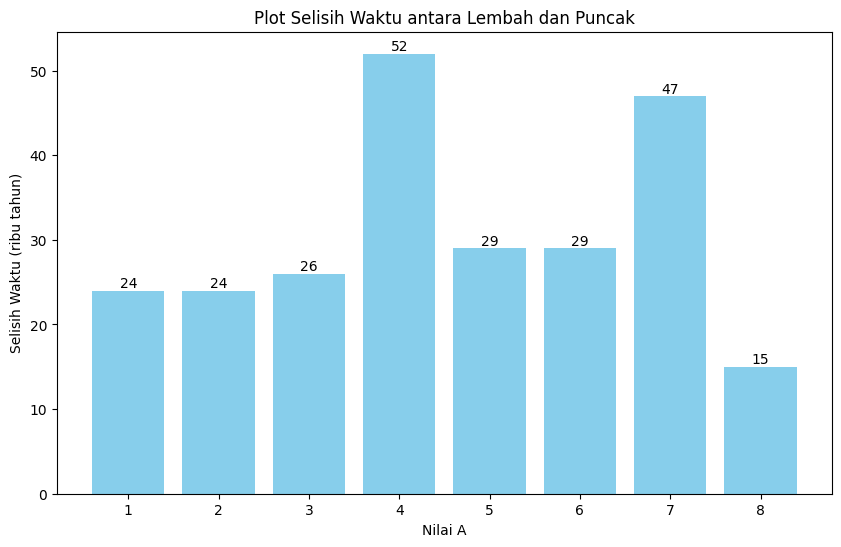

In [ ]:
# Waktu lembah dan puncak
lembah = [798, 719, 636, 551, 431, 357, 259, 136, 24]
puncak = [774, 695, 610, 499, 402, 328, 212, 121, 0]

# Hitung selisih waktu antara lembah dan puncak
A = []
for i in range(len(lembah) -1):
    A_i = lembah[i] - puncak[i]
    A.append(A_i)

# Cetak hasil perhitungan
for i, selisih in enumerate(A):
  print(f"A_{i+1} (Selisih waktu antara lembah {i+1} dan puncak {i+1}) = {selisih}")

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(A) + 1), A, color='skyblue')
plt.xlabel("Nilai A")
plt.ylabel("Selisih Waktu (ribu tahun)")
plt.title("Plot Selisih Waktu antara Lembah dan Puncak")
plt.xticks(range(1, len(A) + 1))

for i, val in enumerate(A):
    plt.text(i + 1, val, str(val), ha='center', va='bottom')

plt.show()

Tidak ada lembah untuk puncak ke-9
B_1 (Selisih waktu antara puncak 1 dan lembah 2) = 55
B_2 (Selisih waktu antara puncak 2 dan lembah 3) = 59
B_3 (Selisih waktu antara puncak 3 dan lembah 4) = 59
B_4 (Selisih waktu antara puncak 4 dan lembah 5) = 68
B_5 (Selisih waktu antara puncak 5 dan lembah 6) = 45
B_6 (Selisih waktu antara puncak 6 dan lembah 7) = 69
B_7 (Selisih waktu antara puncak 7 dan lembah 8) = 76
B_8 (Selisih waktu antara puncak 8 dan lembah 9) = 97


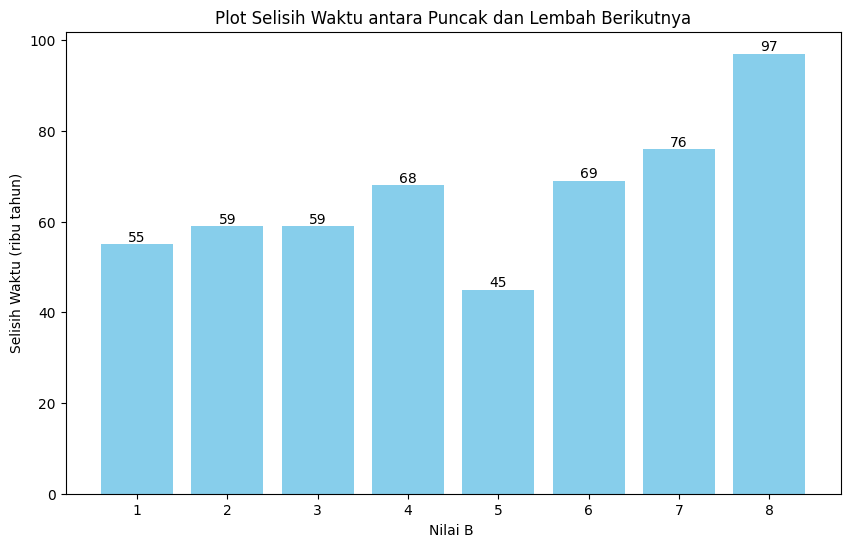

In [ ]:
# Waktu lembah dan puncak
lembah = [798, 719, 636, 551, 431, 357, 259, 136, 24]
puncak = [774, 695, 610, 499, 402, 328, 212, 121, 0]

# Hitung selisih waktu antara puncak dan lembah berikutnya (B_i)
B = []
for i in range(len(puncak)):
    if i < len(lembah) -1:
        B_i = abs(lembah[i+1] - puncak[i]) # Menggunakan abs untuk memastikan waktu positif
        B.append(B_i)
    else:
      print(f"Tidak ada lembah untuk puncak ke-{i+1}")

# Cetak hasil perhitungan
for i, selisih in enumerate(B):
  print(f"B_{i+1} (Selisih waktu antara puncak {i+1} dan lembah {i+2}) = {selisih}")

# Cetak hasil perhitungan dan buat plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(B) + 1), B, color='skyblue')
plt.xlabel("Nilai B ")
plt.ylabel("Selisih Waktu (ribu tahun)")
plt.title("Plot Selisih Waktu antara Puncak dan Lembah Berikutnya")
plt.xticks(range(1, len(B) + 1))

for i, val in enumerate(B):
    plt.text(i + 1, val, str(val), ha='center', va='bottom')

plt.show()

A_1 + B_1 = 24 + 55 = 79
A_2 + B_2 = 24 + 59 = 83
A_3 + B_3 = 26 + 59 = 85
A_4 + B_4 = 52 + 68 = 120
A_5 + B_5 = 29 + 45 = 74
A_6 + B_6 = 29 + 69 = 98
A_7 + B_7 = 47 + 76 = 123
A_8 + B_8 = 15 + 97 = 112


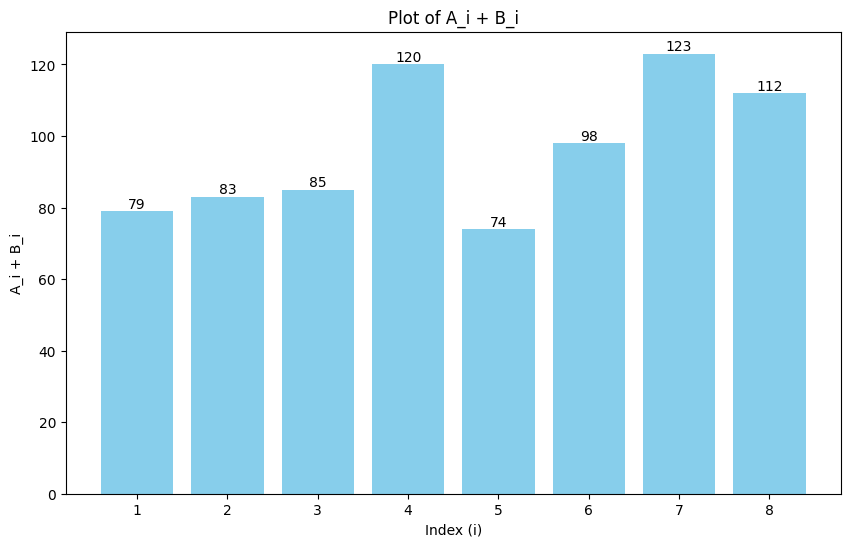

In [ ]:
distances = []
for i in range(min(len(lembah) - 1, len(puncak))):
    distance = abs(lembah[i] - puncak[i]) + abs(puncak[i] - lembah[i+1])
    distances.append(distance)
    print(f"A_{i+1} + B_{i+1} = {abs(lembah[i] - puncak[i])} + {abs(puncak[i] - lembah[i+1])} = {distance}")

# Plotting A_i + B_i as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(distances) + 1), distances, color='skyblue')
plt.xlabel("Index (i)")
plt.ylabel("A_i + B_i")
plt.title("Plot of A_i + B_i")
plt.xticks(range(1, len(distances) + 1))

for i, val in enumerate(distances):
    plt.text(i + 1, val, str(val), ha='center', va='bottom')

plt.show()

B_1 + A_2 = 55 + 24 = 79
B_2 + A_3 = 59 + 26 = 85
B_3 + A_4 = 59 + 52 = 111
B_4 + A_5 = 68 + 29 = 97
B_5 + A_6 = 45 + 29 = 74
B_6 + A_7 = 69 + 47 = 116
B_7 + A_8 = 76 + 15 = 91
B_8 + A_9 = 97 + 24 = 121


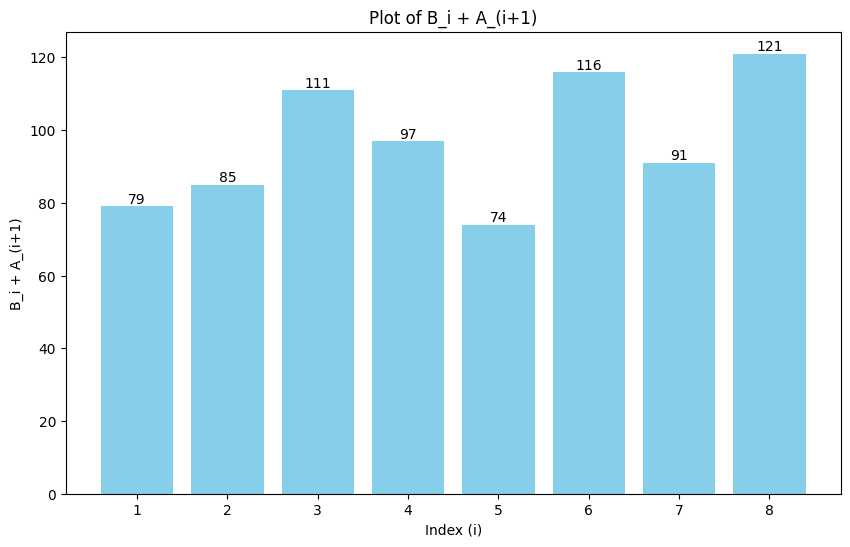

In [ ]:
distances = []
for i in range(min(len(lembah) - 1, len(puncak) -1)): # Iterate up to second to last elements
    b_i = abs(lembah[i+1] - puncak[i])
    a_next = abs(lembah[i+1] - puncak[i+1])
    distance = b_i + a_next
    distances.append(distance)
    print(f"B_{i+1} + A_{i+2} = {b_i} + {a_next} = {distance}")

# Plotting B_i + A_(i+1) as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(distances) + 1), distances, color='skyblue')
plt.xlabel("Index (i)")
plt.ylabel("B_i + A_(i+1)")
plt.title("Plot of B_i + A_(i+1)")
plt.xticks(range(1, len(distances) + 1))

for i, val in enumerate(distances):
    plt.text(i + 1, val, str(val), ha='center', va='bottom')

plt.show()

# Regresi Sinusoidal

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

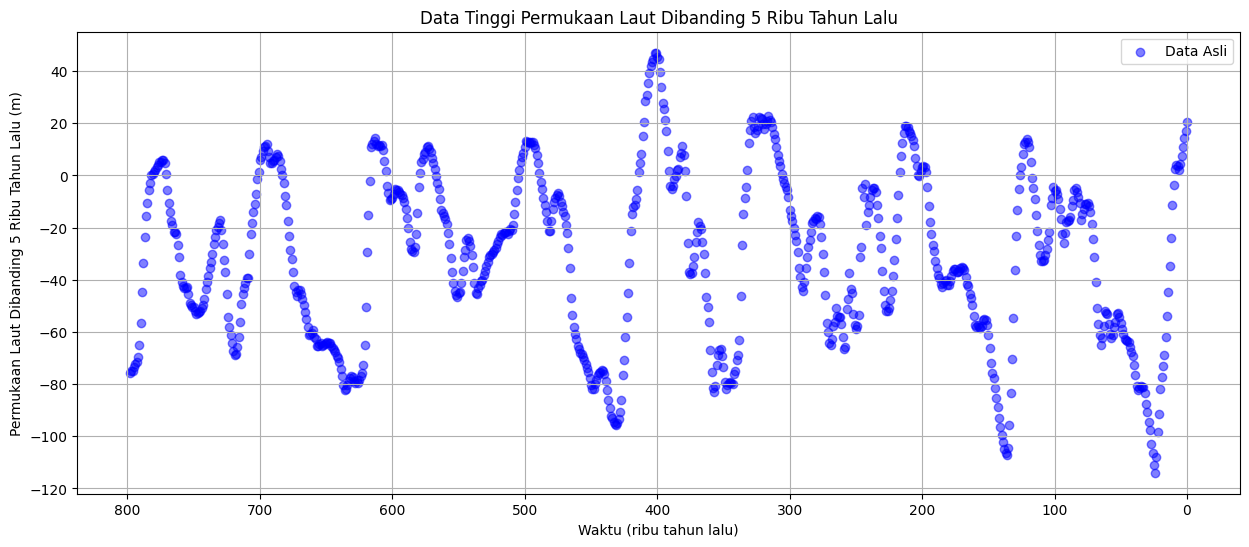

Data untuk Periode 1:
    Waktu  Sea Level Error Upper
0     798                 -75.73
1     797                 -74.96
2     796                 -74.88
3     795                 -73.30
4     794                 -72.14
..    ...                    ...
74    724                 -54.27
75    723                 -58.22
76    722                 -61.05
77    721                 -64.18
78    720                 -67.32

[79 rows x 2 columns]


Data untuk Periode 2:
     Waktu  Sea Level Error Upper
79     719                 -68.74
80     718                 -68.33
81     717                 -65.65
82     716                 -61.86
83     715                 -56.13
..     ...                    ...
157    641                 -70.11
158    640                 -71.38
159    639                 -74.11
160    638                 -76.84
161    637                 -80.26

[83 rows x 2 columns]


Data untuk Periode 3:
     Waktu  Sea Level Error Upper
162    636                 -82.25
163    635  

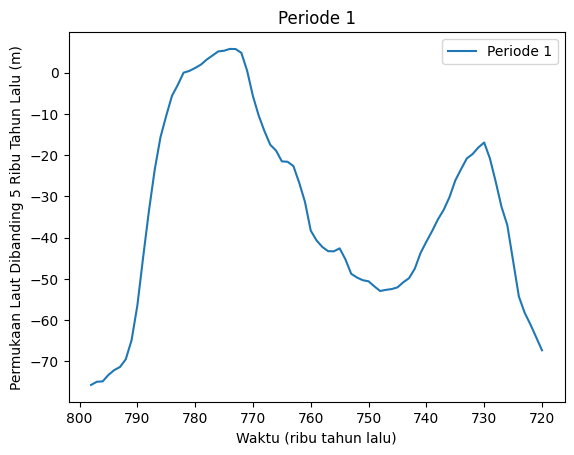

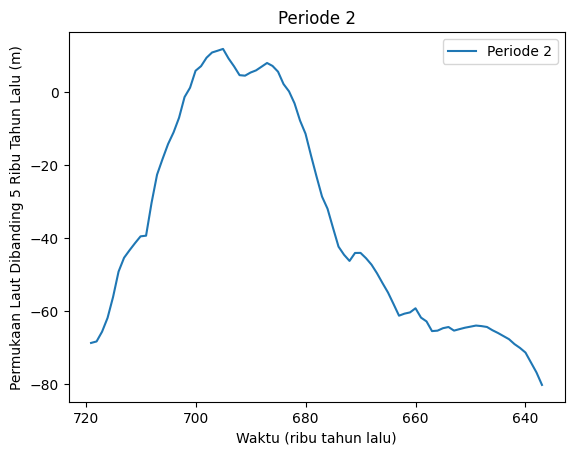

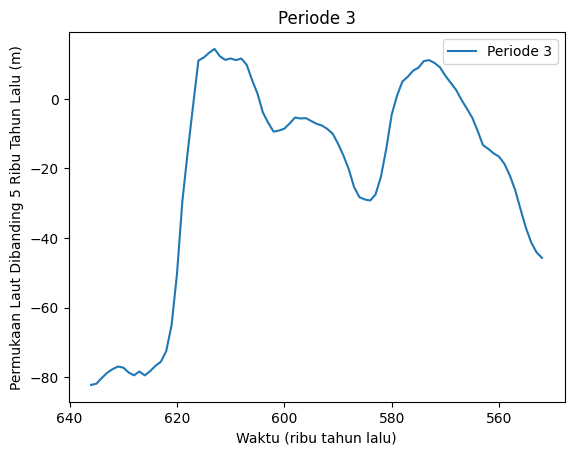

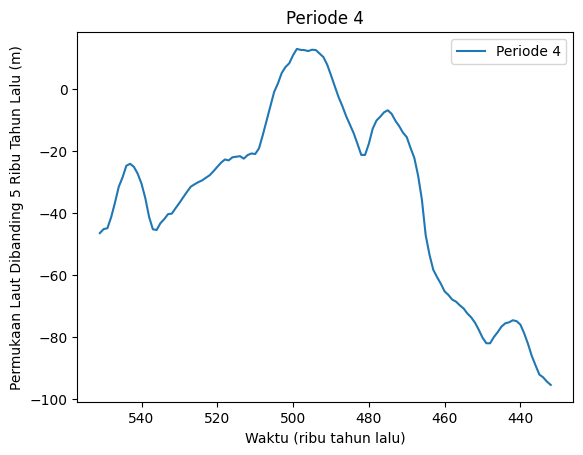

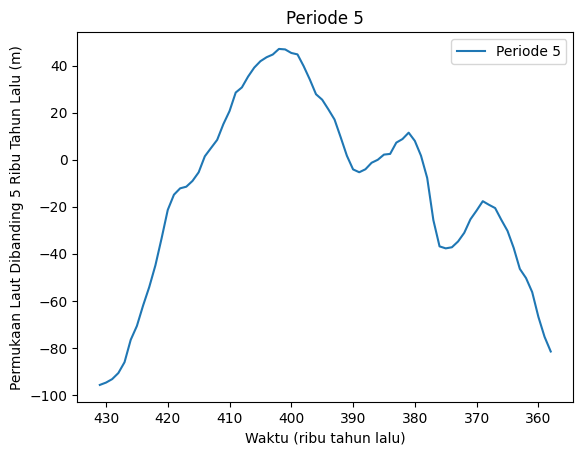

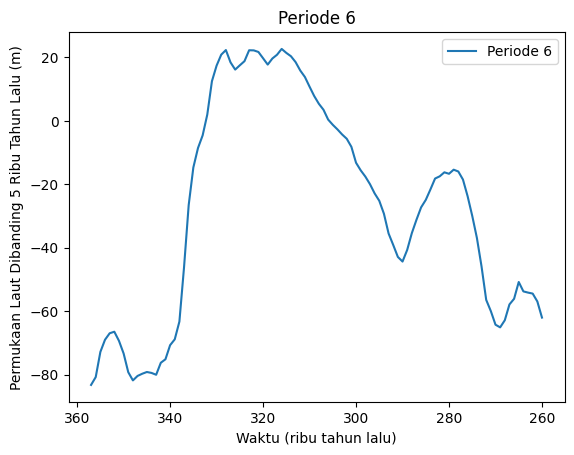

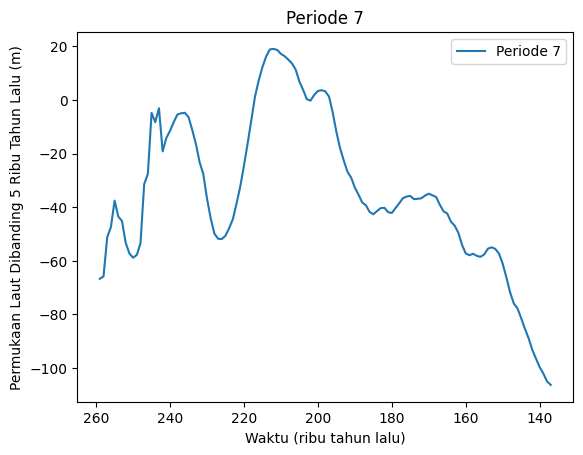

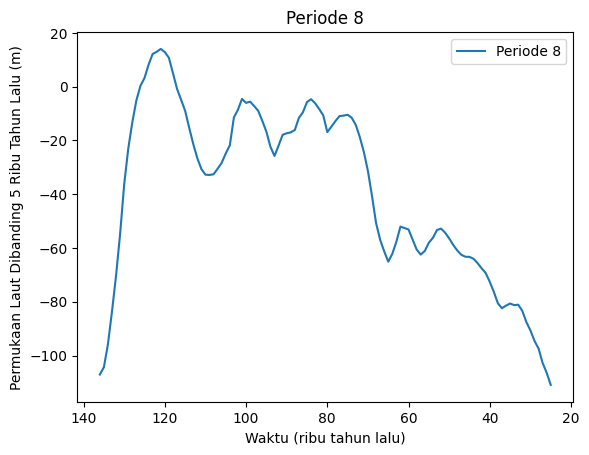

In [ ]:
# Import Dataset
link = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTacoDEDwQG-V8RUcgo3PEiFqrBBAFePbGjxNoXMrNh8ozninhqJh30Et2mmBc-5mEa9aGD2qaq_-7X/pub?output=xlsx'

# Membaca file Excel dari URL dan memuatnya sebagai DataFrame Pandas
data = pd.read_excel(link)

# Hapus kolom yang berisi NaN
data.dropna(axis=1, inplace=True)

kolom_waktu = 'Waktu'
kolom_nilai = 'Sea Level Error Upper'


# Membuat plot data asli
plt.figure(figsize=(15, 6))
plt.scatter(data[kolom_waktu], data[kolom_nilai], label='Data Asli', color='blue', alpha=0.5)
plt.title('Data Tinggi Permukaan Laut Dibanding 5 Ribu Tahun Lalu')
plt.xlabel('Waktu (ribu tahun lalu)')
plt.ylabel('Permukaan Laut Dibanding 5 Ribu Tahun Lalu (m)')
plt.legend()
plt.grid()

# Membalik sumbu x
plt.gca().invert_xaxis()
plt.show()
# Menentukan durasi khusus dari periode glasial ke sebelum glasial selanjutnya
durasi_lembah_ke_lembah = [79, 83, 85, 120, 74, 98, 123, 112]    # Durasi untuk setiap periode

# Inisialisasi variabel
start_time = 798  # Mulai dari waktu 794
periods = []

# Iterasi melalui durasi khusus
for duration in durasi_lembah_ke_lembah:
    end_time = start_time - duration  # Mengurangi waktu
    period_data = data[(data[kolom_waktu] <= start_time) & (data[kolom_waktu] > end_time)]
    periods.append(period_data)
    start_time = end_time  # Update start time untuk periode berikutnya

# Print data untuk periode 1 sampai 8
for i, period_data in enumerate(periods):
    print(f"Data untuk Periode {i + 1}:")
    print(period_data)
    print("\n")  # Tambahkan baris kosong untuk pemisah

for i, period_data in enumerate(periods):
    plt.figure()
    plt.plot(period_data[kolom_waktu], period_data[kolom_nilai], label=f'Periode {i+1}')
    plt.title(f'Periode {i+1}')
    plt.xlabel('Waktu (ribu tahun lalu)')
    plt.ylabel('Permukaan Laut Dibanding 5 Ribu Tahun Lalu (m)')
    plt.legend()
    plt.gca().invert_xaxis()
    plt.show()

Parameter yang diestimasi:
Amplitudo (a): 29.78805767117008
Frekuensi (b):  0.06355527971768841
Pergeseran fase (c):  1.537118488549744
Offset (d): -31.269710626006223
R-squared:  0.4170695313294899
Error (RMSE):  25.01124696947228


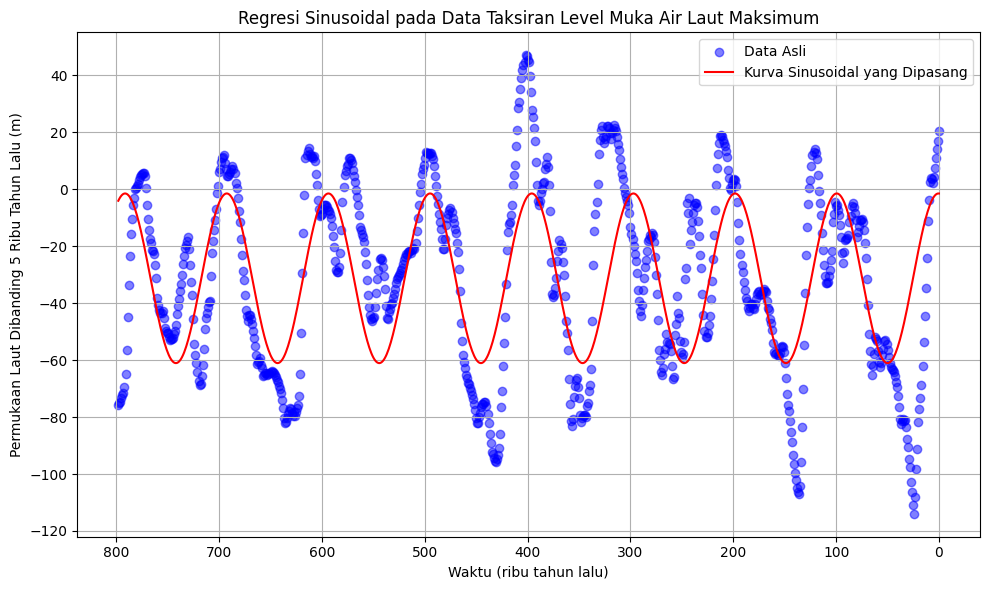

In [ ]:
# Mendefinisikan fungsi sinusoidal
def sinusoidal(x, a, b, c, d):
    return a * np.sin(b * x + c) + d

# Mengambil data dari DataFrame
x_data = data[kolom_waktu].values
y_data = data[kolom_nilai].values

# Menghitung tebakan awal untuk parameter
d_opt = np.mean(y_data)  # Rata-rata dari data y
a_opt = (np.max(y_data) - np.min(y_data)) / 2  # Amplitudo
# Menghitung frekuensi untuk 8 periode
periods = 8
b_opt = (periods * 2 * np.pi) / (max(x_data) - min(x_data))  # Frekuensi untuk 8 periode
c_opt = 0  # Pergeseran fase

# Melakukan fitting model
initial_guess = [a_opt, b_opt, c_opt, d_opt]
popt, pcov = curve_fit(sinusoidal, x_data, y_data, p0=initial_guess, maxfev=2000000000)

# Mengambil parameter optimal
a_opt, b_opt, c_opt, d_opt = popt
y_pred = sinusoidal(x_data, *popt)

# Menghitung R-squared
ss_res = np.sum((y_data - y_pred) ** 2)
ss_tot = np.sum((y_data - np.mean(y_data)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

# Menampilkan hasil dengan 4 angka di belakang koma
print(f'Parameter yang diestimasi:')
print(f'Amplitudo (a): {a_opt:}')
print(f'Frekuensi (b): {b_opt: }')
print(f'Pergeseran fase (c): {c_opt: }')
print(f'Offset (d): {d_opt: }')
print(f'R-squared: {r_squared: }')
print(f'Error (RMSE): {np.sqrt(ss_res / len(y_data)): }')  # Menampilkan RMSE


# Plot data asli dan kurva fitted
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Data Asli', color='blue', alpha=0.5)
plt.plot(x_data, y_pred, label='Kurva Sinusoidal yang Dipasang', color='red')
plt.title('Regresi Sinusoidal pada Data Taksiran Level Muka Air Laut Maksimum')
plt.xlabel('Waktu (ribu tahun lalu)')
plt.ylabel('Permukaan Laut Dibanding 5 Ribu Tahun Lalu (m)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.gca().invert_xaxis()
plt.show()

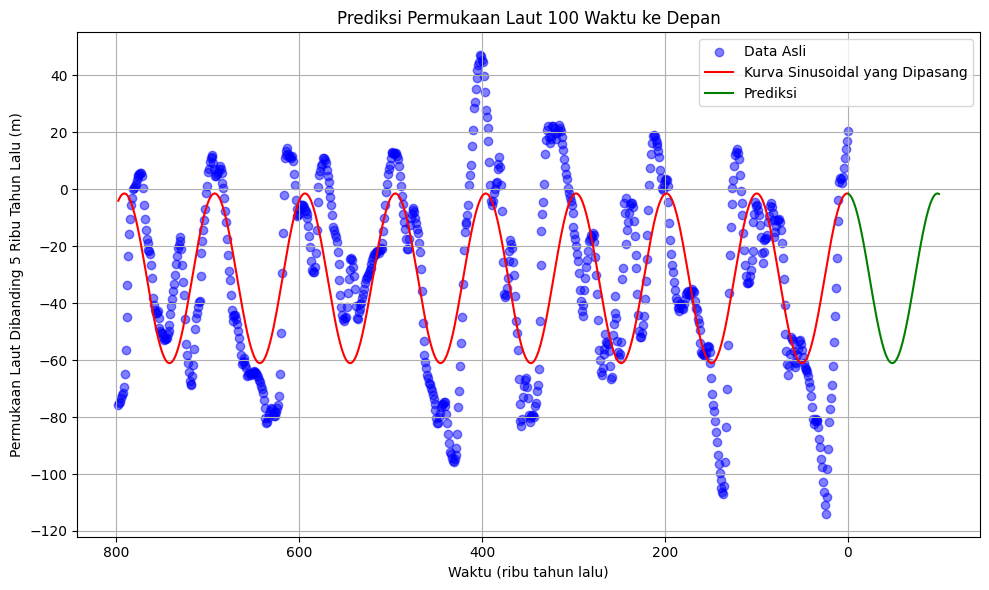

,Waktu,Prediksi Permukaan Laut
0,-100,-1.648910
1,-99,-1.508507
2,-98,-1.488277
3,-97,-1.588302
4,-96,-1.808179
...,...,...
95,-5,-3.302506
96,-4,-2.707653
97,-3,-2.228132
98,-2,-1.865878


In [ ]:
# Prediksi 100 waktu ke depan
future_times = np.arange(min(x_data) - 100, min(x_data), 1) # 100 waktu ke depan
future_predictions = sinusoidal(future_times, *popt)

# Plot prediksi
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Data Asli', color='blue', alpha=0.5)
plt.plot(x_data, y_pred, label='Kurva Sinusoidal yang Dipasang', color='red')
plt.plot(future_times, future_predictions, label='Prediksi', color='green')
plt.title('Prediksi Permukaan Laut 100 Waktu ke Depan')
plt.xlabel('Waktu (ribu tahun lalu)')
plt.ylabel('Permukaan Laut Dibanding 5 Ribu Tahun Lalu (m)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.gca().invert_xaxis()
plt.show()

# Menampilkan tabel prediksi
prediksi_df = pd.DataFrame({'Waktu': future_times, 'Prediksi Permukaan Laut': future_predictions})
prediksi_df

In [ ]:
#  Buat DataFrame untuk menyimpan nilai x dan y dari kurva merah (paling sesuai)
best_fit_df = pd.DataFrame({'Waktu': x_data, 'Tinggi Permukaan Laut (Fitted)': y_pred})

# Menampilkan DataFrame
best_fit_df

,Waktu,Tinggi Permukaan Laut (Fitted)
0,798,-4.045757
1,797,-3.332811
2,796,-2.732672
3,795,-2.247763
4,794,-1.880042
...,...,...
794,4,-2.203157
795,3,-1.847967
796,2,-1.611578
797,1,-1.494947


,period,a,b,c,d,r_squared,rmse
0,1,-25.379448,0.151243,-55.951227,-34.417587,0.575715,15.336443
1,2,40.446973,0.078086,-2.122615,-35.869208,0.918072,8.483469
2,3,192258.438200,0.000627,45.185872,-192254.589798,0.658043,18.021649
3,4,50.174093,0.036185,8.535423,-52.007260,0.831905,12.318752
4,5,145143.015371,0.001093,32.555493,-145116.426358,0.816447,16.780278
5,6,39.747905,0.073260,-2.462574,-22.780655,0.706824,18.681043
6,7,-81.265574,0.022950,6.179488,-89.397095,0.712359,15.787170
7,8,-45.550739,0.037316,1.053391,-54.212868,0.706057,17.752187


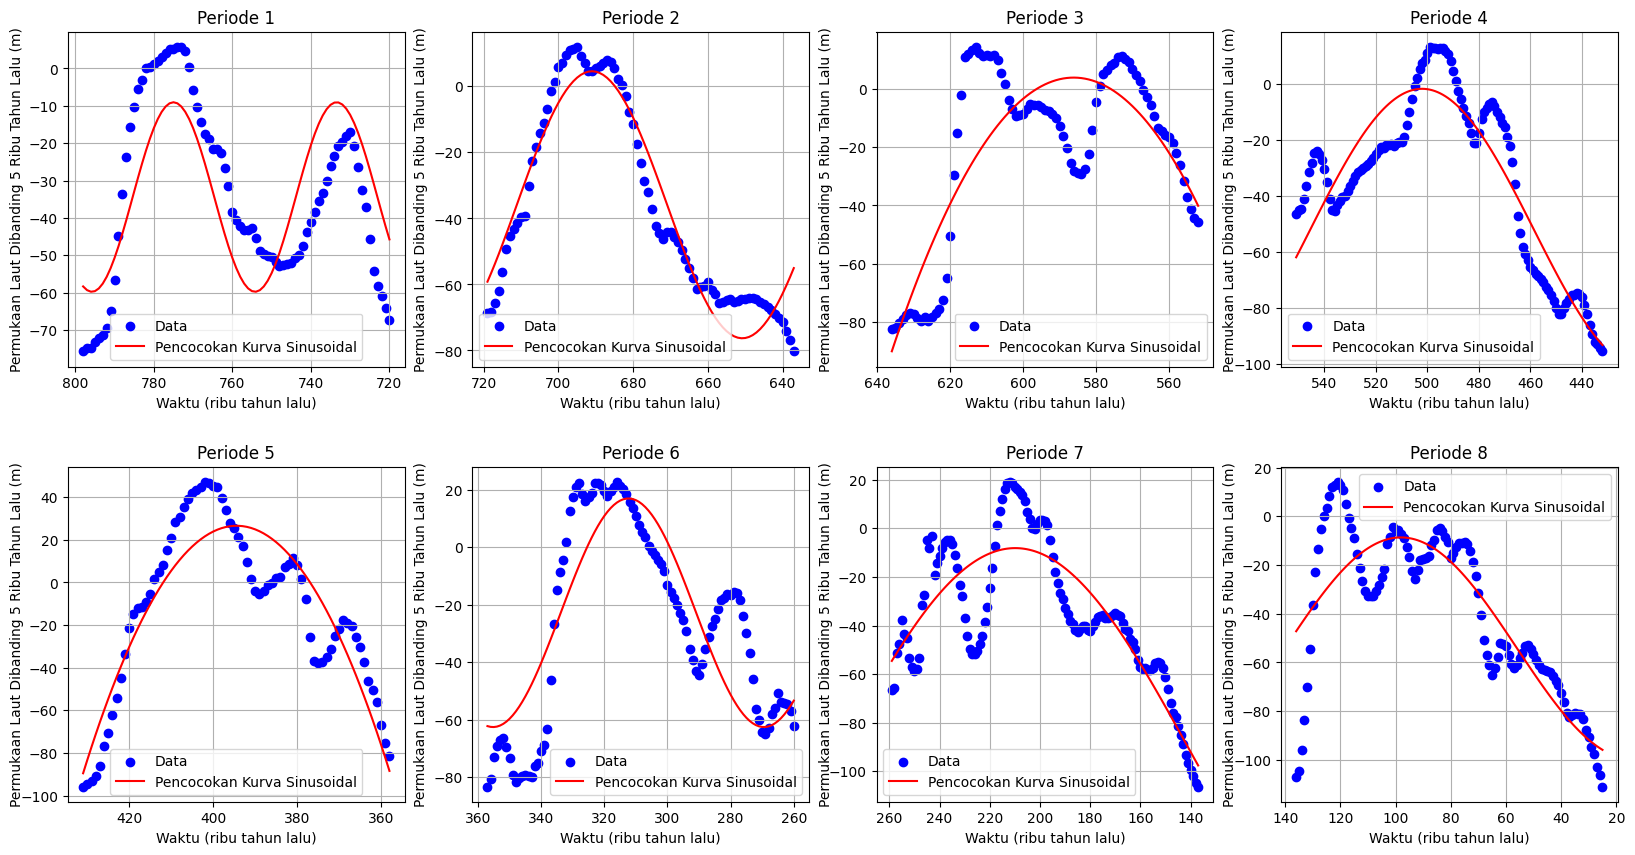

In [ ]:
# Memotong Per Glasial i dengan Glasial i+1
# Inisialisasi variabel
start_time = 798  # Mulai dari waktu 798
periods = []

# Iterasi melalui durasi khusus
for duration in durasi_lembah_ke_lembah:
    end_time = start_time - duration  # Mengurangi waktu
    period_data = data[(data[kolom_waktu] <= start_time) & (data[kolom_waktu] > end_time)]
    periods.append(period_data)
    start_time = end_time  # Update start time untuk periode berikutnya

# Mendefinisikan fungsi sinusoidal
def sinusoidal(x, a, b, c, d):
    return a * np.sin(b * x + c) + d

# Menyimpan hasil
results = []

# Menyiapkan subplots
fig, axs = plt.subplots(2, 4, figsize=(20, 10))  # 2 baris, 4 kolom

# Mengatur jarak antara baris subplot
plt.subplots_adjust(hspace=0.3)  # Menambahkan jarak vertikal antara baris

# Menganalisis setiap periode
for i, period_data in enumerate(periods):
    x_data = period_data[kolom_waktu].values
    y_data = period_data[kolom_nilai].values

    # Menghitung tebakan awal berdasarkan data periode
    d_opt = np.mean(y_data)  # Rata-rata dari data y
    a_opt = (np.max(y_data) - np.min(y_data)) / 2  # Amplitudo
    b_opt = 2 * np.pi / (durasi_lembah_ke_lembah[i])  # Frekuensi berdasarkan durasi periode
    c_opt = 0  # Pergeseran fase

    try:
        initial_guess = [a_opt, b_opt, c_opt, d_opt]

        # Melakukan fitting model
        popt, pcov = curve_fit(sinusoidal, x_data, y_data, p0=initial_guess, maxfev=5000)

        # Mengambil parameter optimal
        a_opt, b_opt, c_opt, d_opt = popt
        y_pred = sinusoidal(x_data, *popt)

        # Menghitung R-squared
        ss_res = np.sum((y_data - y_pred) ** 2)
        ss_tot = np.sum((y_data - np.mean(y_data)) ** 2)
        r_squared = 1 - (ss_res / ss_tot)
        rmse = np.sqrt(np.mean((y_data - y_pred) ** 2))

        results.append({
            'period': i + 1,
            'a': a_opt,
            'b': b_opt,
            'c': c_opt,
            'd': d_opt,
            'r_squared': r_squared,
            'rmse': rmse
        })

        # Menampilkan plot di subplot
        axs[i // 4, i % 4].scatter(x_data, y_data, label='Data', color='blue')
        axs[i // 4, i % 4].plot(x_data, y_pred, label='Pencocokan Kurva Sinusoidal', color='red')
        axs[i // 4, i % 4].set_title(f'Periode {i + 1}')
        axs[i // 4, i % 4].set_xlabel('Waktu (ribu tahun lalu)')
        axs[i // 4, i % 4].set_ylabel('Permukaan Laut Dibanding 5 Ribu Tahun Lalu (m)')
        axs[i // 4, i % 4].get_yaxis().set_label_coords(-0.13, 0.5)  # Mengatur posisi label Y lebih dekat
        axs[i // 4, i % 4].legend()
        axs[i // 4, i % 4].grid()
        # Membalik sumbu x
        axs[i // 4, i % 4].invert_xaxis()

    except Exception as e:
        print(f"Error fitting period {i + 1}: {e}")

# Membuat DataFrame dari Hasil
results_df = pd.DataFrame(results)
results_df

In [ ]:
# Buat DataFrame dari hasil
results_df = pd.DataFrame(results)
file_name = "results.xlsx"

# Simpan DataFrame dalam file excel
results_df.to_excel(file_name, index=False)

# Menampilkan DataFrame
results_df

print(f"The results have been saved as '{file_name}'. You can now download it.")

The results have been saved as 'results.xlsx'. You can now download it.


In [ ]:
from google.colab import files
files.download(file_name)